In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import sys
import rebound
sys.path.insert(1, '../SPOCKalt')
import plotFunctions
import simsetup

dataset = pd.read_csv('../modeldata/tryThetaSTDunwrap.csv')


In [230]:
dataset = pd.read_csv('../modeldata/trydifOrdSTD.csv')

In [231]:
temp  = pd.read_csv('../modeldata/tryThetaSTDunwrap.csv')

In [232]:
temp.describe()

,index,MEGNO,MEGNOstd,threeBRfillfac,threeBRfillstd,chiSec,nearThetaSTD,p2/1,p3/2,EMcrossnear,EMcrossfar,EMcrossouter,instability_time,shadow_instability_time
count,138543.000000,131150.000000,131150.000000,131150.000000,1.311500e+05,138543.000000,131150.000000,138543.000000,138543.000000,138543.000000,138543.000000,138543.000000,1.385430e+05,1.385430e+05
mean,69271.000000,6.232303,1.215945,1.359796,8.319864e+09,0.501295,33.443562,1.418755,1.422836,0.150181,0.362667,0.578510,2.863147e+08,2.925407e+08
std,39994.063509,11.516257,3.124624,14.562645,3.010634e+12,0.381965,64.287362,0.340741,0.345986,0.112919,0.203083,0.349974,4.371732e+08,4.417942e+08
min,0.000000,-0.430259,0.000004,0.004187,2.528506e-07,0.000003,0.003778,1.007289,1.006925,0.004612,0.006545,0.012454,3.464102e-02,0.000000e+00
25%,34635.500000,1.978115,0.006879,0.159031,5.782035e-04,0.091313,0.424073,1.166666,1.166752,0.072493,0.201376,0.315946,6.485543e+04,5.858617e+04
50%,69271.000000,2.005367,0.041101,0.444107,4.237097e-03,0.502829,1.729980,1.307033,1.310603,0.118127,0.320830,0.500692,1.484704e+06,1.498063e+06
75%,103906.500000,3.345559,0.466819,1.217691,2.582538e-02,0.910490,41.395076,1.586583,1.590345,0.186970,0.491676,0.761991,1.000000e+09,1.000000e+09
max,138542.000000,130.498145,38.305852,2302.130815,1.090290e+15,0.999997,874.470902,3.251143,3.117589,0.982453,1.194679,3.124353,1.000050e+09,1.000050e+09


In [233]:
temp.loc[temp[temp['nearThetaSTD']<0.004].index]

,index,MEGNO,MEGNOstd,threeBRfillfac,threeBRfillstd,chiSec,nearThetaSTD,p2/1,p3/2,EMcrossnear,EMcrossfar,EMcrossouter,prelimStable,Stable,instability_time,shadow_instability_time
51291,51291,2.000825,0.000437,0.065437,0.000025,0.843203,0.003778,2.317173,1.666681,0.40573,0.751098,1.461571,True,True,1.000000e+09,1.000000e+09
60560,60560,2.000825,0.000437,0.065437,0.000025,0.843203,0.003778,2.317173,1.666681,0.40573,0.751098,1.461571,True,True,1.000000e+09,1.000000e+09


In [234]:
dataset.loc[60560]

index                             60560
MEGNO                          2.000825
MEGNOstd                       0.000437
threeBRfillfac                 0.065437
threeBRfillstd                 0.000025
chiSec                         0.843203
nearThetaSTD                   0.003778
p2/1                           2.317173
p3/2                           1.666681
EMcrossnear                     0.40573
EMcrossfar                     0.751098
EMcrossouter                   1.461571
prelimStable                       True
Stable                             True
instability_time           1000000000.0
shadow_instability_time    1000000000.0
Name: 60560, dtype: object

temp.loc[105966]

In [235]:
dataset.describe()

,index,MEGNO,MEGNOstd,threeBRfillfac,threeBRfillstd,chiSec,nearThetaSTD,p2/1,p3/2,EMcrossnear,EMcrossfar,EMcrossouter,instability_time,shadow_instability_time
count,138543.000000,131150.000000,131150.000000,131150.000000,1.311500e+05,138543.000000,131150.000000,138543.000000,138543.000000,138543.000000,138543.000000,138543.000000,1.385430e+05,1.385430e+05
mean,69271.000000,6.232303,1.215945,1.359796,8.319864e+09,0.501295,22.534272,1.418755,1.422836,0.150181,0.362667,0.578510,2.863147e+08,2.925407e+08
std,39994.063509,11.516257,3.124624,14.562645,3.010634e+12,0.381965,37.787020,0.340741,0.345986,0.112919,0.203083,0.349974,4.371732e+08,4.417942e+08
min,0.000000,-0.430259,0.000004,0.004187,2.528506e-07,0.000003,0.003778,1.007289,1.006925,0.004612,0.006545,0.012454,3.464102e-02,0.000000e+00
25%,34635.500000,1.978115,0.006879,0.159031,5.782035e-04,0.091313,0.421923,1.166666,1.166752,0.072493,0.201376,0.315946,6.485543e+04,5.858617e+04
50%,69271.000000,2.005367,0.041101,0.444107,4.237097e-03,0.502829,1.694460,1.307033,1.310603,0.118127,0.320830,0.500692,1.484704e+06,1.498063e+06
75%,103906.500000,3.345559,0.466819,1.217691,2.582538e-02,0.910490,35.303714,1.586583,1.590345,0.186970,0.491676,0.761991,1.000000e+09,1.000000e+09
max,138542.000000,130.498145,38.305852,2302.130815,1.090290e+15,0.999997,814.293101,3.251143,3.117589,0.982453,1.194679,3.124353,1.000050e+09,1.000050e+09


In [236]:
def hasnull(row):
    numnulls = row.isnull().sum()
    if numnulls == 0:
        return 0
    else:
        return 1

def tmax(row):
    #sim = get_sim(row, csvfolder)
    tmax = 1e4 # replace with a calculation of tmax
    return tmax

In [237]:
%%time
if 'hasnull' not in dataset.columns:
    dataset['hasnull'] = dataset.apply(hasnull, axis=1)
    #dataset['tmax'] = dataset.apply(tmax, axis=1)
    # dataset['tmax'] = dataset.apply(lambda x:1e4, axis=1) # this version would just set tmax=1e4 for all of them

    #dataset.to_csv(trainingdatafolder+"trainingdata.csv", encoding='ascii')

CPU times: user 5.98 s, sys: 23.5 ms, total: 6 s
Wall time: 6 s


In [238]:
mask = (dataset['hasnull'] == 0 )
filtData = dataset[mask]

In [239]:
filtData.describe()

,index,MEGNO,MEGNOstd,threeBRfillfac,threeBRfillstd,chiSec,nearThetaSTD,p2/1,p3/2,EMcrossnear,EMcrossfar,EMcrossouter,instability_time,shadow_instability_time,hasnull
count,131150.000000,131150.000000,131150.000000,131150.000000,1.311500e+05,131150.000000,131150.000000,131150.000000,131150.000000,131150.000000,131150.000000,131150.000000,1.311500e+05,1.311500e+05,131150.0
mean,71773.100252,6.232303,1.215945,1.359796,8.319864e+09,0.500623,22.534272,1.425611,1.428627,0.154347,0.366099,0.588217,3.023789e+08,3.089538e+08,0.0
std,38971.670160,11.516257,3.124624,14.562645,3.010634e+12,0.379235,37.787020,0.340437,0.345518,0.113175,0.202511,0.350999,4.438412e+08,4.483993e+08,0.0
min,0.000000,-0.430259,0.000004,0.004187,2.528506e-07,0.000033,0.003778,1.008302,1.006925,0.004612,0.020136,0.032324,5.507922e+00,0.000000e+00,0.0
25%,39048.250000,1.978115,0.006879,0.159031,5.782035e-04,0.095017,0.421923,1.169349,1.168768,0.076399,0.205595,0.325232,9.760101e+04,9.003296e+04,0.0
50%,72189.500000,2.005367,0.041101,0.444107,4.237097e-03,0.501470,1.694460,1.318943,1.319531,0.122961,0.325190,0.510735,2.335529e+06,2.337539e+06,0.0
75%,105355.750000,3.345559,0.466819,1.217691,2.582538e-02,0.905400,35.303714,1.597182,1.598911,0.197317,0.495352,0.773136,1.000000e+09,1.000000e+09,0.0
max,138542.000000,130.498145,38.305852,2302.130815,1.090290e+15,0.999978,814.293101,3.251143,3.117589,0.982453,1.194679,3.124353,1.000050e+09,1.000050e+09,0.0


In [240]:
plot = filtData

In [241]:
plot['dup']=plot[['threeBRfillfac','EMcrossnear','instability_time','MEGNO']].duplicated()
plot = plot.drop(plot[plot['dup']==True].index)
plot = plot.drop(plot[plot['threeBRfillfac'] >20].index)
#plot = plot.drop(plot[plot['nearThetaSTD']>2].index)
# plot = plot.drop(plot[plot['3/2_order']>70].index)
# plot = plot.drop(plot[plot['MMRstrengthnear']<.5].index)


/tmp/ipykernel_40947/258478185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot['dup']=plot[['threeBRfillfac','EMcrossnear','instability_time','MEGNO']].duplicated()


In [242]:
plot.describe()

,index,MEGNO,MEGNOstd,threeBRfillfac,threeBRfillstd,chiSec,nearThetaSTD,p2/1,p3/2,EMcrossnear,EMcrossfar,EMcrossouter,instability_time,shadow_instability_time,hasnull
count,119880.000000,119880.000000,119880.000000,119880.000000,1.198800e+05,119880.000000,119880.000000,119880.000000,119880.000000,119880.000000,119880.000000,119880.000000,1.198800e+05,1.198800e+05,119880.0
mean,69816.334785,6.179252,1.200631,1.096094,9.100715e+09,0.501177,22.895147,1.427084,1.430783,0.155716,0.366899,0.591156,3.085340e+08,3.148881e+08,0.0
std,39155.046341,11.471516,3.112483,1.877771,3.148971e+12,0.378707,38.317566,0.340309,0.345537,0.113880,0.202277,0.352445,4.465440e+08,4.508915e+08,0.0
min,0.000000,-0.430259,0.000004,0.004187,2.528506e-07,0.000033,0.003778,1.009586,1.022473,0.006381,0.025996,0.049489,5.507922e+00,0.000000e+00,0.0
25%,36330.750000,1.978491,0.006605,0.156153,5.479604e-04,0.096179,0.427416,1.170805,1.170553,0.076980,0.206672,0.327362,1.010639e+05,9.318961e+04,0.0
50%,70228.500000,2.004830,0.039886,0.436129,4.076840e-03,0.503123,1.747600,1.321844,1.322354,0.125402,0.326460,0.513611,2.561108e+06,2.583093e+06,0.0
75%,103286.250000,3.262400,0.443206,1.190294,2.494031e-02,0.905011,35.901739,1.599797,1.602215,0.201186,0.496002,0.776466,1.000000e+09,1.000000e+09,0.0
max,138542.000000,130.498145,38.305852,19.994304,1.090290e+15,0.999978,814.293101,3.251143,3.117589,0.982453,1.194679,3.124353,1.000050e+09,1.000050e+09,0.0


In [243]:
import math
import numpy as np

In [244]:
import numpy as np
def plotfill(x):
    p1 = np.log10((x**(-1.5))*(1/(1-(x**(-1)))))
    p2 = math.sqrt(-np.log(1-(x**(-1))))
    return p1+p2

In [245]:
plotfill(1.1)

2.5278175491242747

In [246]:
fillList = np.linspace(1.0001,20,100000)
y = list(map(plotfill,fillList))
y = list(map(lambda x: (x)+5.5, y))

/tmp/ipykernel_40947/257262412.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter((plot['threeBRfillfac']),np.log10(plot['instability_time']), s=2, c=(np.log10(plot['nearThetaSTD']/1.8)), cmap=plt.cm.get_cmap("cool",7),vmin=0, vmax=2,alpha=.8)


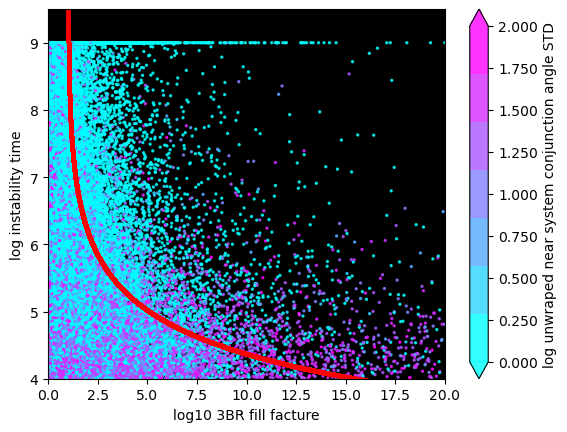

In [248]:
ax = plt.axes()
plt.scatter((plot['threeBRfillfac']),np.log10(plot['instability_time']), s=2, c=(np.log10(plot['nearThetaSTD']/1.8)), cmap=plt.cm.get_cmap("cool",7),vmin=0, vmax=2,alpha=.8)
cbar = plt.colorbar(orientation="vertical", extend="both",
                   pad=0.05, shrink=1, aspect=20, format="%.3f")

plt.scatter(fillList, y,s=4, c = 'red')
ax.set_xlim([0,20])
ax.set_ylim([4,9.5])
plt.xlabel("log10 3BR fill facture")
plt.ylabel("log instability time")
cbar.set_label('log unwraped near system conjunction angle STD')
ax.set_facecolor("black")


In [217]:
temp=plot

In [212]:
temp=temp.drop(temp[temp['instability_time']<1e8].index)

In [213]:
temp=temp.drop(temp[temp['threeBRfillfac']<7].index)

In [214]:
temp

,index,MEGNO,MEGNOstd,threeBRfillfac,threeBRfillstd,chiSec,nearThetaSTD,p2/1,p3/2,EMcrossnear,EMcrossfar,EMcrossouter,prelimStable,Stable,instability_time,shadow_instability_time,hasnull,dup
4596,4596,1.980184,0.035499,8.365599,0.187844,0.059996,47.495711,1.624115,1.051388,0.033972,0.381692,0.428630,True,False,1.841528e+08,8.776506e+05,0,False
8989,8989,1.996357,0.001003,17.242870,0.637588,0.203510,18.695357,2.406107,1.053186,0.035150,0.795603,0.858719,True,True,1.000049e+09,1.000049e+09,0,False
20421,20421,2.000061,0.000050,11.526274,0.219490,0.045592,59.202362,2.671283,1.045802,0.030306,0.925218,0.983564,True,True,1.000045e+09,1.000045e+09,0,False
25695,25695,1.987960,0.006480,10.608050,0.295664,0.056294,22.902635,1.355222,1.059263,0.039129,0.224636,0.272555,True,True,1.000000e+09,1.000000e+09,0,False
26613,26613,2.000878,0.000432,7.723513,0.184246,0.090876,145.923775,2.078893,1.091213,0.059921,0.628881,0.726485,True,True,1.000000e+09,1.000000e+09,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131883,131883,1.998627,0.000273,7.565241,0.088710,0.176510,143.159903,1.692552,1.071606,0.047186,0.420239,0.487254,True,True,1.000000e+09,1.000000e+09,0,False
131943,131943,1.998712,0.000529,19.994304,0.227637,0.034577,62.642951,2.236503,1.040177,0.026609,0.710198,0.755705,True,True,1.000000e+09,1.000000e+09,0,False
134745,134745,1.929078,0.031364,8.038749,0.171681,0.318928,132.945219,1.707639,1.064752,0.042715,0.428667,0.489692,True,True,1.000000e+09,1.000000e+09,0,False
135211,135211,1.982822,0.010520,11.269881,0.450377,0.027099,49.679622,2.159194,1.078163,0.051454,0.670558,0.756515,True,True,1.000000e+09,1.000000e+09,0,False


In [220]:
temp=temp.drop(temp[temp['nearThetaSTD']>.1].index)

In [221]:
temp

,index,MEGNO,MEGNOstd,threeBRfillfac,threeBRfillstd,chiSec,nearThetaSTD,p2/1,p3/2,EMcrossnear,EMcrossfar,EMcrossouter,prelimStable,Stable,instability_time,shadow_instability_time,hasnull,dup
25129,25129,2.070435,0.035192,0.021150,0.000010,0.996850,0.097342,1.999681,2.364063,0.587274,0.774623,1.816812,True,True,1.000000e+09,1.000000e+09,0,False
33161,33161,1.934541,0.030430,0.039767,0.000021,0.168028,0.097866,2.000614,2.221799,0.587773,0.702696,1.703494,True,True,1.000000e+09,1.000000e+09,0,False
35322,35322,1.973413,0.012986,0.030516,0.000018,0.997752,0.069506,2.000787,2.109105,0.587834,0.644620,1.611384,True,False,1.762811e+07,1.775601e+07,0,False
105966,105966,1.236936,0.142065,0.080775,0.000020,0.018545,0.067485,2.000734,2.328968,0.587813,0.757036,1.789846,True,True,1.000000e+09,1.000000e+09,0,False
118124,118124,1.947789,0.025199,0.027401,0.000006,0.491116,0.097762,2.000171,2.277352,0.587513,0.730961,1.747923,True,True,1.000000e+09,1.000000e+09,0,False


<Axes: >

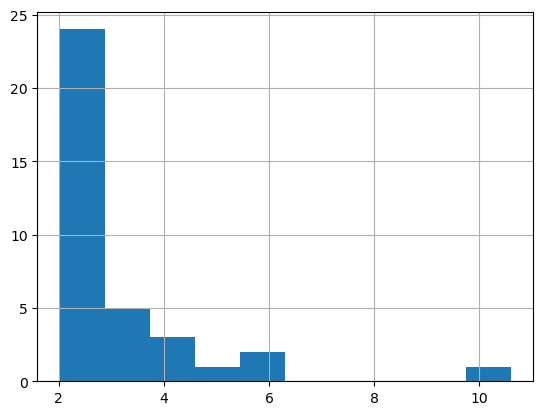

In [78]:
temp["threeBRfillfac"].hist()

/tmp/ipykernel_40947/2189497489.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(np.log10(temp['threeBRfillfac']),np.log10(temp['instability_time']), s=10, c=(np.log10(temp['nearThetaSTD']/1.8)), cmap=plt.cm.get_cmap("spring",20),alpha=1)


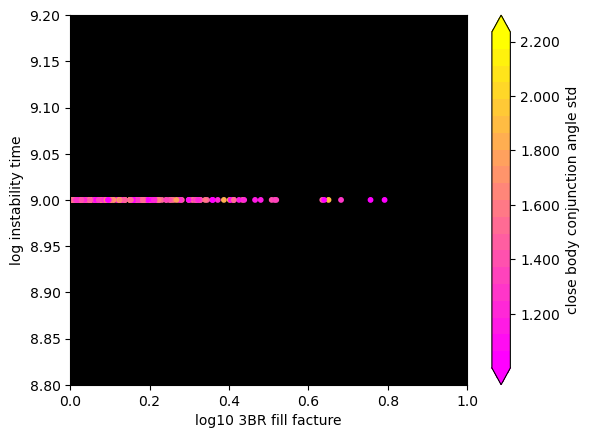

In [60]:
ax = plt.axes()
plt.scatter(np.log10(temp['threeBRfillfac']),np.log10(temp['instability_time']), s=10, c=(np.log10(temp['nearThetaSTD']/1.8)), cmap=plt.cm.get_cmap("spring",20),alpha=1)
cbar = plt.colorbar(orientation="vertical", extend="both",
                   pad=0.05, shrink=1, aspect=20, format="%.3f")

plt.scatter(fillList, y,s=4, c = 'red')

ax.set_xlim([0,1])
ax.set_ylim([8.8,9.2])
plt.xlabel("log10 3BR fill facture")
plt.ylabel("log instability time")
cbar.set_label('close body conjunction angle std')
ax.set_facecolor("black")

In [36]:
initial = pd.read_csv('../modeldata/originalCondAllData.csv')

In [51]:
def getval( Pratio: list):
    maxorder = 9
    delta = 0.03
    minperiodratio = Pratio-delta
    maxperiodratio = Pratio+delta # too many resonances close to 1
    if maxperiodratio >.999:
        maxperiodratio =.999
    res = plotFunctions.resonant_period_ratios(minperiodratio,maxperiodratio, order=maxorder)
    val1 = [10000000,10]
    val2 = [10000000,10]
    for i,each in enumerate(res):
        if np.abs((each[0]/each[1])-Pratio)<np.abs((val2[0]/val2[1])-Pratio):
            #which = i
            
            val2 = each
        if np.abs((val2[0]/val2[1])-Pratio)<np.abs((val1[0]/val1[1])-Pratio):
            val1,val2 = val2,val1
    
    

    return val1,val2

In [63]:
def get_data(sim, Nint, Nout):
    '''gets dataframe '''
    times = np.linspace(0,Nint,Nout)
    data = pd.DataFrame()
    theta12 = np.zeros(Nout)
    theta23 = np.zeros(Nout)
    p2p1 = np.zeros(Nout)
    p3p2 = np.zeros(Nout)
    e1 = np.zeros(Nout)
    e2 = np.zeros(Nout)
    e3 = np.zeros(Nout)
    l1 = np.zeros(Nout)
    l2 = np.zeros(Nout)
    l3 = np.zeros(Nout)
    pomegarel12 = np.zeros(Nout)
    pomegarel23 = np.zeros(Nout)
    theta12a = np.zeros(Nout)
    theta23a = np.zeros(Nout)
    theta12b = np.zeros(Nout)
    theta23b = np.zeros(Nout)
    
    
    ps = sim.particles
    for i,each in enumerate(times):
        p2p1[i] = ((ps[2].P/ps[1].P))
        p3p2[i]=((ps[3].P/ps[2].P))
        e1[i]=(ps[1].e)
        e2[i]=(ps[2].e)
        e3[i]=(ps[3].e)
        l1[i]=(ps[1].l)
        l2[i]=(ps[2].l)
        l3[i]=(ps[3].l)
        pomegarel12[i]=(plotFunctions.getPomega(sim,1,2))
        pomegarel23[i]=(plotFunctions.getPomega(sim,2,3))

        sim.integrate(each, exact_finish_time=0)

    Pratio12 = 1/np.median(p2p1)
    Pratio32 = 1/np.median(p3p2)
    pval12a, pval12b = getval(Pratio12)
    pval23a, pval23b = getval(Pratio32)
    #print(pomegarel12)
    for x in range(Nout):
        theta12a[x]=plotFunctions.calcTheta(l1[x],l2[x],pomegarel12[x],pval12a)
        theta23a[x]=plotFunctions.calcTheta(l2[x],l3[x],pomegarel23[x],pval23a)
        theta12b[x]=plotFunctions.calcTheta(l1[x],l2[x],pomegarel12[x],pval12a)
        theta23b[x]=plotFunctions.calcTheta(l2[x],l3[x],pomegarel23[x],pval23a)
    
    theta12a = np.unwrap(theta12a)
    theta23a = np.unwrap(theta23a)
    theta12b = np.unwrap(theta12b)
    theta23b = np.unwrap(theta23b)
    theta12,pval12 = (lambda a,b: a if np.std(a[0])<np.std(b[0]) else b)((theta12a,pval12a),(theta12b,pval12b))
    theta23,pval23 = (lambda a,b: a if np.std(a[0])<np.std(b[0]) else b)((theta23a,pval23a),(theta23b,pval23b))
    #theta12 = np.mod(theta12,2*np.pi)
    #theta23 = np.mod(theta23,2*np.pi)
    # print(np.log10(np.std(theta12)/1.8))
    # print(np.log10(np.std(theta23)/1.8))

    data=pd.DataFrame({'time':times,'p2/p1':p2p1,'p3/p2':p3p2,'theta12':theta12,'theta23':theta23,'e1':e1,'e2':e2,'e3':e3})
    return data,pval12,pval23

In [65]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
def get_plot(num,Nout=5000,Nint=100000):
    sim = simsetup.get_simList(initial.iloc[num,2:])
    simsetup.init_sim_parameters(sim)
    figure = plt.figure(figsize=[20,35])
    gs = GridSpec(4, 2, figure=figure)
    #gs.update(wspace = .1, hspace = .1)
    
    data, res12, res23 = get_data(sim,Nout,Nint)
    ax1 = plt.subplot(gs[0,0])
    ax1.set_title('Stable:' +str(dataset['Stable'][num])+'   ID:'+str(num))
    data.plot.scatter(ax = ax1,x="p2/p1", y="p3/p2",s=2, c="time", colormap="copper", alpha=.35)
    ax2 = plt.subplot(gs[1,:2])
    ax2.set_title(str(res12[1])+':'+str(res12[0]))
    data.plot.scatter(ax=ax2,x="time", y="theta12",s=1)
    ax3 = plt.subplot(gs[2,:2])
    ax3.set_title(str(res23[1])+':'+str(res23[0]))
    data.plot.scatter(ax = ax3,x="time", y="theta23",s=1)
    ax4 = plt.subplot(gs[3,:2])
    data.plot(ax=ax4,x='time',y=['e1','e2','e3'])
    ax5 = plt.subplot(gs[0,1])
    ax5.set_title('threeBR fill:' +str(dataset['threeBRfillfac'][num]))
    ax5.set_aspect('equal')
    rebound.OrbitPlot(sim,fig=figure, ax=ax5,ylim=[-3,3],xlim=[-3,3])
    plt.savefig(f'imgs/'+str(np.log10(dataset['nearThetaSTD'][num]/1.8))+'.png')
    #plt.show(False)

    #return figure
from multiprocessing import Pool

#%%

systems = temp['index']




if __name__ == "__main__":  # confirms that the code is under main function

  

    
    #bound = test = np.linspace(0, 138543, num=138544, endpoint=True, retstep=False, dtype=int, axis=0)
    with Pool() as p:
        p.map(get_plot, systems)

/home/ethadhani/summerSPOCK/datafilt/../SPOCKalt/simsetup.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sim.add(m=data[0], x=data[1], y=data[2], z=data[3], vx=data[4], vy=data[5], vz=data[6])
/home/ethadhani/summerSPOCK/datafilt/../SPOCKalt/simsetup.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sim.add(m=data[0], x=data[1], y=data[2], z=data[3], vx=data[4], vy=data[5], vz=data[6])
/home/ethadhani/summerSPOCK/datafilt/../SPOCKalt/simsetup.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with D

In [30]:
findstd = []
x = np.linspace(0,1000,1000)
for i in x:
    findstd.append(np.pi+3*np.cos(x*100))

print(np.std(findstd))


2.1224617628594427


In [31]:
findstd=[]
x = np.linspace(0,1000,1000)
for i in x:
    findstd.append(np.mod(10*x,2*np.pi))

print(np.std(findstd))


1.8146636641196545
